In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [51]:
sns.set()
sns.set_context("paper")

Text(0.5, 0, 'Number of weights')

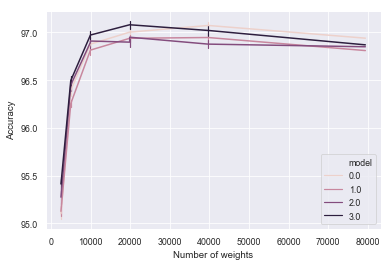

In [531]:
s = pd.read_pickle('./results/experiment1.pkl')
original = s.loc[s['pruning_method'] == 'original']
tmp = s.loc[s['pruning_perc'] == 50]
tmp = tmp.loc[tmp['pruning_method'] == 'magnitude_class_blinded']
tmp = tmp.loc[tmp['accuracy'] > 95]
tmp = tmp.append(original, ignore_index=True)
tmp['model'] = tmp['model'].astype(float)

# plt.ylim(90, 98)
sns.lineplot(x='number_of_weights', y='accuracy', hue='model', err_style='bars', data=tmp, markers=True, ci='sd', legend='full', linewidth=1.5)
plt.ylabel('Accuracy')
plt.xlabel('Number of weights')

## Comparison of pruning strategies

Text(0.5, 0, 'Number of weights')

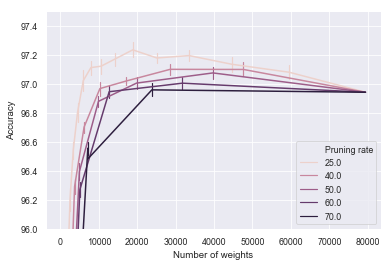

In [534]:
s = pd.read_pickle('./results/experiment1.pkl')
original = s.loc[s['pruning_method'] == 'original']
s = s.loc[s['pruning_method'] == 'magnitude_class_blinded']
# tmp = tmp.loc[tmp['accuracy'] > 95]

original['pruning_perc'] = 25
s = s.append(original, ignore_index=True)
original['pruning_perc'] = 40
s = s.append(original, ignore_index=True)
original['pruning_perc'] = 50
s = s.append(original, ignore_index=True)
original['pruning_perc'] = 60
s = s.append(original, ignore_index=True)
original['pruning_perc'] = 70
s = s.append(original, ignore_index=True)

s['pruning_perc'] = s['pruning_perc'].astype(float)
s = s.loc[s['model'] == 0]

#s = s.loc[s['pruning_perc'] == 25]
#s = s.loc[s['run'] == 0]


sns.lineplot(x='number_of_weights', y='accuracy', hue='pruning_perc', err_style='bars', data=s, markers=True, ci='sd', legend='full', linewidth=1.5)
plt.ylim(96, 97.5)
plt.legend().texts[0].set_text('Pruning rate')
plt.ylabel('Accuracy')
plt.xlabel('Number of weights')

(96, 98)

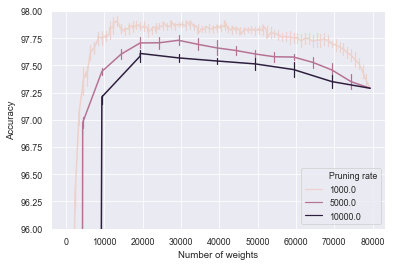

In [535]:
s = pd.read_pickle('./results/experiment3.pkl')
original = s.loc[s['pruning_method'] == 'original']
s = s.loc[s['pruning_method'] == 'magnitude_class_blinded_absolute']

original['pruning_perc'] = 1000
s = s.append(original, ignore_index=True)
original['pruning_perc'] = 5000
s = s.append(original, ignore_index=True)
original['pruning_perc'] = 10000
s = s.append(original, ignore_index=True)

s['pruning_perc'] = s['pruning_perc'].astype(float)


sns.lineplot(x='number_of_weights', y='accuracy', hue='pruning_perc', err_style='bars', data=s, markers=True, ci='sd', legend='full', linewidth=1.5)
plt.legend().texts[0].set_text('Pruning rate')
plt.ylabel('Accuracy')
plt.xlabel('Number of weights')
plt.ylim(96, 98)

Text(0.5, 0, 'Number of weights')

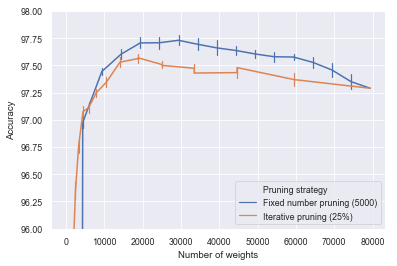

In [536]:
s = pd.read_pickle('./results/experiment3.pkl')
original = s.loc[s['pruning_method'] == 'original']
s = s.loc[s['pruning_method'] == 'magnitude_class_blinded_absolute']

original['pruning_perc'] = 1000
s = s.append(original, ignore_index=True)
original['pruning_perc'] = 5000
s = s.append(original, ignore_index=True)
original['pruning_perc'] = 10000
s = s.append(original, ignore_index=True)
s = s.loc[s['pruning_perc'] == 5000]
# s = s.loc[s['number_of_weights'] != 0]
s['Pruning strategy'] = 'Fixed number pruning (5000)'

s2 = pd.read_pickle('./results/experiment2.pkl')
original2 = s2.loc[s2['pruning_method'] == 'original']

s2 = s2.loc[s2['pruning_method'] == 'magnitude_class_blinded']
s2 = s2.loc[s2['variable'] == False]
s2 = s2.loc[s2['pruning_perc'] == 25]
# s2 = s2.loc[s2['number_of_weights'] != 0]
s2 = s2.append(original2, ignore_index=True)
s2['Pruning strategy'] = 'Iterative pruning (25%)'

original2['pruning_perc'] = 25
s = s.append(s2, ignore_index=True)

sns.lineplot(x='number_of_weights', y='accuracy', hue='Pruning strategy', err_style='bars', data=s, markers=True, ci='sd', legend='full', linewidth=1.5)
plt.ylim(96, 98)
plt.ylabel('Accuracy')
plt.xlabel('Number of weights')

Text(0.5, 0, 'Pruning strategy')

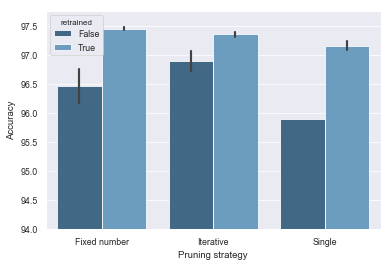

In [537]:
s = pd.read_pickle('./results/experiment4.pkl')
s = s.loc[s['pruning_perc'] == 85]
s = s.loc[s['pruning_method'] == 'magnitude_class_blinded']
s['strategy'] = 'Single'

t = pd.DataFrame(columns=['run', 'accuracy', 'pruning_perc', 'number_of_weights', 'pruning_method', 'time',
                        'retrain_change', 'retrain_epochs'])
t['accuracy'] = s['accuracy'] - s['retrain_change']
t['number_of_weights'] = s['number_of_weights']
t['accuracy'] = t['accuracy'].astype(float)
t['strategy'] = 'Single'
#t['run'] = s['run']
#t['variable'] = 2.0
#t['pruning_perc'] = 50
#t['retrain_change'] = 0
#t['retrain_epochs'] = 0
#t['time'] = 0

s2 = pd.read_pickle('./results/experiment3.pkl')
s2 = s2.loc[s2['pruning_perc'] == 5000]
s2 = s2.loc[s2['pruning_method'] == 'magnitude_class_blinded_absolute']
s2 = s2.loc[s2['number_of_weights'] == 9400]
s2['strategy'] = 'Fixed number'

t2 = pd.DataFrame(columns=['run', 'accuracy', 'pruning_perc', 'number_of_weights', 'pruning_method', 'time',
                        'retrain_change', 'retrain_epochs'])
t2['accuracy'] = s2['accuracy'] - s2['retrain_change']
t2['number_of_weights'] = s2['number_of_weights']
t2['accuracy'] = t2['accuracy'].astype(float)
t2['strategy'] = 'Fixed number'

s3 = pd.read_pickle('./results/experiment2.pkl')
s3 = s3.loc[s3['pruning_method'] == 'magnitude_class_blinded']
s3 = s3.loc[s3['number_of_weights'] == 10598]
s3 = s3.loc[s3['variable'] == False]
s3['strategy'] = 'Iterative'

t3 = pd.DataFrame(columns=['run', 'accuracy', 'pruning_perc', 'number_of_weights', 'pruning_method', 'time',
                        'retrain_change', 'retrain_epochs'])
t3['accuracy'] = s3['accuracy'] - s3['retrain_change']
t3['number_of_weights'] = s3['number_of_weights']
t3['accuracy'] = t3['accuracy'].astype(float)
t3['strategy'] = 'Iterative'

s = s.append(s2, ignore_index=True)
s = s.append(s3, ignore_index=True)

t = t.append(t2, ignore_index=True)
t = t.append(t3, ignore_index=True)
t['retrained'] = False
s['retrained'] = True

s['pruning_perc'] = s['pruning_perc'].astype(float)
t['pruning_perc'] = t['pruning_perc'].astype(float)

s = s.append(t, ignore_index=True)

sns.barplot(x='strategy', y='accuracy', hue='retrained', data=s, ci='sd', order=['Fixed number', 'Iterative', 'Single'], palette="Blues_d")
plt.ylim(94, 97.75)
plt.ylabel('Accuracy')
plt.xlabel('Pruning strategy')

## Analysis of effect of retraining on pruning

Text(0.5, 0, 'Number of weights')

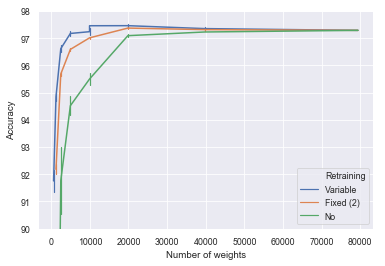

In [538]:
s = pd.read_pickle('./results/experiment2.pkl')
original = s.loc[s['pruning_method'] == 'original']
s = s.loc[s['pruning_method'] == 'magnitude_class_blinded']
s = s.loc[s['accuracy'] > 90]
s = s.loc[s['pruning_perc'] == 50]

original['variable'] = True
s = s.append(original, ignore_index=True)
original['variable'] = False
s = s.append(original, ignore_index=True)

t = pd.DataFrame(columns=['run', 'accuracy', 'pruning_perc', 'number_of_weights', 'pruning_method', 'time',
                        'retrain_change', 'retrain_epochs'])

t['accuracy'] = s['accuracy'] - s['retrain_change']
t['number_of_weights'] = s['number_of_weights']
t['run'] = s['run']
t['variable'] = s['variable']
t['pruning_perc'] = 50
t['retrain_change'] = 0
t['retrain_epochs'] = 0
t['pruning_method'] = 'magnitude_class_blinded'
t['time'] = 0
t['accuracy'] = t['accuracy'].astype(float)
t = t.loc[t['variable'] == False]
t['variable'] = 'No'

s.loc[s['variable'] == True, ['variable']] = 'Variable'
s.loc[s['variable'] == False, ['variable']] = 'Fixed (2)'

s = s.append(t, ignore_index=True)
plt.ylim(90, 98)
sns.lineplot(x='number_of_weights', y='accuracy', hue='variable', err_style='bars', data=s, markers=True, ci='sd', legend='full', linewidth=1.5)
plt.legend().texts[0].set_text('Retraining')
plt.ylabel('Accuracy')
plt.xlabel('Number of weights')

## Comparison of different pruning methods

Text(0.5, 0, 'Number of weights')

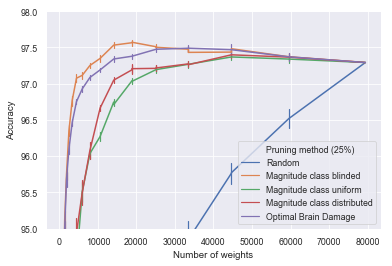

In [539]:
s = pd.read_pickle('./results/experiment2.pkl')

original = s.loc[s['pruning_method'] == 'original']
s = s.loc[s['pruning_perc'] == 25]
s = s.loc[s['variable'] == False]

original['pruning_method'] = 'random_pruning'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_blinded'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_uniform'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_distributed'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'optimal_brain_damage'
s = s.append(original, ignore_index=True)

s.loc[s['pruning_method'] == 'random_pruning', ['pruning_method']] = 'Random'
s.loc[s['pruning_method'] == 'magnitude_class_blinded', ['pruning_method']] = 'Magnitude class blinded'
s.loc[s['pruning_method'] == 'magnitude_class_uniform', ['pruning_method']] = 'Magnitude class uniform'
s.loc[s['pruning_method'] == 'magnitude_class_distributed', ['pruning_method']] = 'Magnitude class distributed'
s.loc[s['pruning_method'] == 'optimal_brain_damage', ['pruning_method']] = 'Optimal Brain Damage'

sns.lineplot(x='number_of_weights', y='accuracy', hue='pruning_method', err_style='bars', data=s, markers=True, ci='sd', legend='full', linewidth=1.5)
plt.legend().texts[0].set_text('Pruning method (25%)')
plt.ylim(95, 98)
plt.ylabel('Accuracy')
plt.xlabel('Number of weights')

Text(0.5, 0, 'Compression Rate')

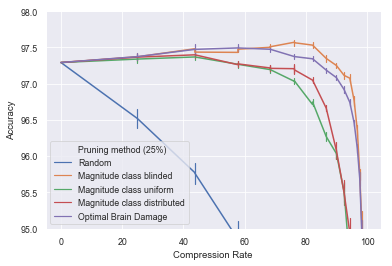

In [552]:
s = pd.read_pickle('./results/experiment2.pkl')

original = s.loc[s['pruning_method'] == 'original']
s = s.loc[s['pruning_perc'] == 25]
s = s.loc[s['variable'] == False]

original['pruning_method'] = 'random_pruning'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_blinded'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_uniform'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_distributed'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'optimal_brain_damage'
s = s.append(original, ignore_index=True)

s.loc[s['pruning_method'] == 'random_pruning', ['pruning_method']] = 'Random'
s.loc[s['pruning_method'] == 'magnitude_class_blinded', ['pruning_method']] = 'Magnitude class blinded'
s.loc[s['pruning_method'] == 'magnitude_class_uniform', ['pruning_method']] = 'Magnitude class uniform'
s.loc[s['pruning_method'] == 'magnitude_class_distributed', ['pruning_method']] = 'Magnitude class distributed'
s.loc[s['pruning_method'] == 'optimal_brain_damage', ['pruning_method']] = 'Optimal Brain Damage'

s['compression_rate'] = (1 - (s['number_of_weights'] / 79400)) * 100

sns.lineplot(x='compression_rate', y='accuracy', hue='pruning_method', err_style='bars', data=s, markers=True, ci='sd', legend='full', linewidth=1.5)
plt.legend().texts[0].set_text('Pruning method (25%)')
plt.ylim(95, 98)
plt.ylabel('Accuracy')
plt.xlabel('Compression Rate')

Text(0.5, 0, 'Number of weights')

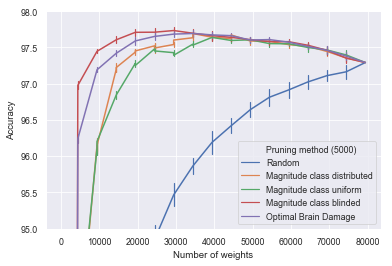

In [541]:
s = pd.read_pickle('./results/experiment3.pkl')

original = s.loc[s['pruning_method'] == 'original']
s = s.loc[s['pruning_perc'] == 5000]

original['pruning_method'] = 'random_pruning_absolute'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_blinded_absolute'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_uniform_absolute'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_distributed_absolute'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'optimal_brain_damage_absolute'
s = s.append(original, ignore_index=True)

s.loc[s['pruning_method'] == 'random_pruning_absolute', ['pruning_method']] = 'Random'
s.loc[s['pruning_method'] == 'magnitude_class_blinded_absolute', ['pruning_method']] = 'Magnitude class blinded'
s.loc[s['pruning_method'] == 'magnitude_class_uniform_absolute', ['pruning_method']] = 'Magnitude class uniform'
s.loc[s['pruning_method'] == 'magnitude_class_distributed_absolute', ['pruning_method']] = 'Magnitude class distributed'
s.loc[s['pruning_method'] == 'optimal_brain_damage_absolute', ['pruning_method']] = 'Optimal Brain Damage'

sns.lineplot(x='number_of_weights', y='accuracy', hue='pruning_method', err_style='bars', data=s, markers=True, ci='sd', legend='full', linewidth=1.5)
plt.legend().texts[0].set_text('Pruning method (5000)')
plt.ylim(95, 98)
plt.ylabel('Accuracy')
plt.xlabel('Number of weights')

Text(0.5, 0, 'Number of weights')

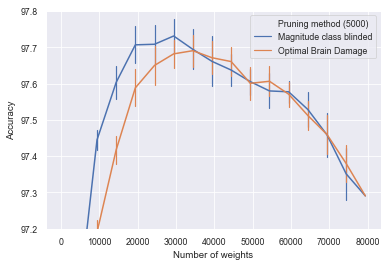

In [542]:
s = pd.read_pickle('./results/experiment3.pkl')

original = s.loc[s['pruning_method'] == 'original']
s = s.loc[s['pruning_perc'] == 5000]

original['pruning_method'] = 'random_pruning_absolute'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_blinded_absolute'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_uniform_absolute'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_distributed_absolute'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'optimal_brain_damage_absolute'
s = s.append(original, ignore_index=True)

s.loc[s['pruning_method'] == 'random_pruning_absolute', ['pruning_method']] = 'Random'
s.loc[s['pruning_method'] == 'magnitude_class_blinded_absolute', ['pruning_method']] = 'Magnitude class blinded'
s.loc[s['pruning_method'] == 'magnitude_class_uniform_absolute', ['pruning_method']] = 'Magnitude class uniform'
s.loc[s['pruning_method'] == 'magnitude_class_distributed_absolute', ['pruning_method']] = 'Magnitude class distributed'
s.loc[s['pruning_method'] == 'optimal_brain_damage_absolute', ['pruning_method']] = 'Optimal Brain Damage'

s = s.loc[s['pruning_method'] != 'Random']
s = s.loc[s['pruning_method'] != 'Magnitude class uniform']
s = s.loc[s['pruning_method'] != 'Magnitude class distributed']

sns.lineplot(x='number_of_weights', y='accuracy', hue='pruning_method', err_style='bars', data=s, markers=True, ci='sd', legend='full', linewidth=1.5)
plt.legend().texts[0].set_text('Pruning method (5000)')
plt.ylim(97.2, 97.8)
plt.ylabel('Accuracy')
plt.xlabel('Number of weights')

Text(0.5, 0, 'Number of weights')

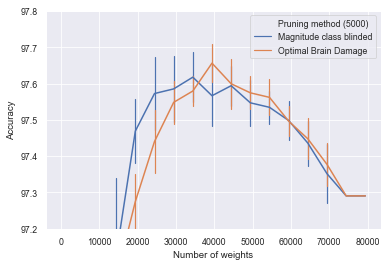

In [543]:
s = pd.read_pickle('./results/experiment3.pkl')

original = s.loc[s['pruning_method'] == 'original']
s = s.loc[s['pruning_perc'] == 5000]

original['pruning_method'] = 'random_pruning_absolute'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_blinded_absolute'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_uniform_absolute'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_distributed_absolute'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'optimal_brain_damage_absolute'
s = s.append(original, ignore_index=True)

s.loc[s['pruning_method'] == 'random_pruning_absolute', ['pruning_method']] = 'Random'
s.loc[s['pruning_method'] == 'magnitude_class_blinded_absolute', ['pruning_method']] = 'Magnitude class blinded'
s.loc[s['pruning_method'] == 'magnitude_class_uniform_absolute', ['pruning_method']] = 'Magnitude class uniform'
s.loc[s['pruning_method'] == 'magnitude_class_distributed_absolute', ['pruning_method']] = 'Magnitude class distributed'
s.loc[s['pruning_method'] == 'optimal_brain_damage_absolute', ['pruning_method']] = 'Optimal Brain Damage'

s = s.loc[s['pruning_method'] != 'Random']
s = s.loc[s['pruning_method'] != 'Magnitude class uniform']
s = s.loc[s['pruning_method'] != 'Magnitude class distributed']

s['new_acc'] = s['accuracy'] - s['retrain_change']
s['new_acc'] = s['new_acc'].astype(float)

sns.lineplot(x='number_of_weights', y='new_acc', hue='pruning_method', err_style='bars', data=s, markers=True, ci='sd', legend='full', linewidth=1.5)
plt.legend().texts[0].set_text('Pruning method (5000)')
plt.ylim(97.2, 97.8)
plt.ylabel('Accuracy')
plt.xlabel('Number of weights')

(20, 100)

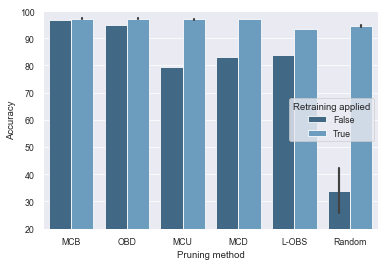

In [545]:
s = pd.read_pickle('./results/experiment4.pkl')
s = s.loc[s['pruning_perc'] == 80]
s = s.loc[s['retrain_epochs'] != 0]
s.loc[s['pruning_method'] == 'random_pruning', ['pruning_method']] = 'Random'
s.loc[s['pruning_method'] == 'magnitude_class_blinded', ['pruning_method']] = 'MCB'
s.loc[s['pruning_method'] == 'magnitude_class_uniform', ['pruning_method']] = 'MCU'
s.loc[s['pruning_method'] == 'magnitude_class_distributed', ['pruning_method']] = 'MCD'
s.loc[s['pruning_method'] == 'optimal_brain_damage', ['pruning_method']] = 'OBD'
s.loc[s['pruning_method'] == 'optimal_brain_surgeon_layer_wise', ['pruning_method']] = 'L-OBS'
s['retrained'] = True

t = pd.read_pickle('./results/experiment4.pkl')
t = t.loc[t['pruning_perc'] == 80]
s = s.loc[s['retrain_epochs'] != 0]
t.loc[t['pruning_method'] == 'random_pruning', ['pruning_method']] = 'Random'
t.loc[t['pruning_method'] == 'magnitude_class_blinded', ['pruning_method']] = 'MCB'
t.loc[t['pruning_method'] == 'magnitude_class_uniform', ['pruning_method']] = 'MCU'
t.loc[t['pruning_method'] == 'magnitude_class_distributed', ['pruning_method']] = 'MCD'
t.loc[t['pruning_method'] == 'optimal_brain_damage', ['pruning_method']] = 'OBD'
t.loc[t['pruning_method'] == 'optimal_brain_surgeon_layer_wise', ['pruning_method']] = 'L-OBS'
t['retrained'] = False
t['accuracy'] = t['accuracy'] - t['retrain_change']
t['accuracy'] = t['accuracy'].astype(float)

s = s.append(t, ignore_index=True)

sns.barplot(x="pruning_method", y="accuracy", data=s, hue='retrained', ci='sd', palette="Blues_d", order=['MCB', 'OBD', 'MCU', 'MCD', 'L-OBS', 'Random'])
plt.ylabel('Accuracy')
plt.xlabel('Pruning method')
plt.legend().set_title('Retraining applied')
plt.ylim(20, 100)

## Baseline experiments

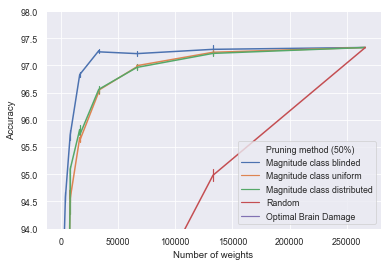

In [546]:
s = pd.read_pickle('./results/experiment5.pkl')
original = s.loc[s['pruning_method'] == 'original']
s = s.loc[s['pruning_perc'] == 50]

original['pruning_method'] = 'random_pruning'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_blinded'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_distributed'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_uniform'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'optimal_brain_damage'
s = s.append(original, ignore_index=True)

s.loc[s['pruning_method'] == 'random_pruning', ['pruning_method']] = 'Random'
s.loc[s['pruning_method'] == 'magnitude_class_blinded', ['pruning_method']] = 'Magnitude class blinded'
s.loc[s['pruning_method'] == 'magnitude_class_uniform', ['pruning_method']] = 'Magnitude class uniform'
s.loc[s['pruning_method'] == 'magnitude_class_distributed', ['pruning_method']] = 'Magnitude class distributed'
s.loc[s['pruning_method'] == 'optimal_brain_damage', ['pruning_method']] = 'Optimal Brain Damage'

sns.lineplot(x='number_of_weights', y='accuracy', hue='pruning_method', err_style='bars', data=s, markers=True, ci='sd', legend='full', linewidth=1.5)
plt.ylim(94, 98)
plt.ylabel('Accuracy')
plt.xlabel('Number of weights')
plt.legend().texts[0].set_text('Pruning method (50%)')

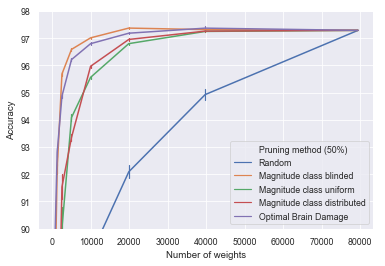

In [547]:
s = pd.read_pickle('./results/experiment2.pkl')
original = s.loc[s['pruning_method'] == 'original']
s = s.loc[s['pruning_perc'] == 50]
s = s.loc[s['variable'] == False]

original['pruning_method'] = 'random_pruning'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_blinded'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_distributed'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_uniform'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'optimal_brain_damage'
s = s.append(original, ignore_index=True)

s.loc[s['pruning_method'] == 'random_pruning', ['pruning_method']] = 'Random'
s.loc[s['pruning_method'] == 'magnitude_class_blinded', ['pruning_method']] = 'Magnitude class blinded'
s.loc[s['pruning_method'] == 'magnitude_class_uniform', ['pruning_method']] = 'Magnitude class uniform'
s.loc[s['pruning_method'] == 'magnitude_class_distributed', ['pruning_method']] = 'Magnitude class distributed'
s.loc[s['pruning_method'] == 'optimal_brain_damage', ['pruning_method']] = 'Optimal Brain Damage'

sns.lineplot(x='number_of_weights', y='accuracy', hue='pruning_method', err_style='bars', data=s, markers=True, ci='sd', legend='full', linewidth=1.5)
plt.ylim(90, 98)
plt.ylabel('Accuracy')
plt.xlabel('Number of weights')
plt.legend().texts[0].set_text('Pruning method (50%)')

(96, 98.5)

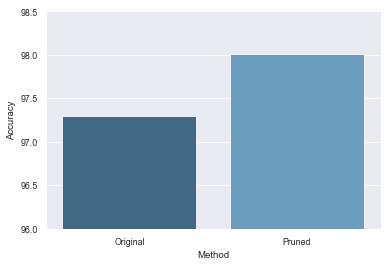

In [548]:
s = pd.read_pickle('./results/experiment3.pkl')

original = s.loc[s['pruning_method'] == 'original']
s = s.loc[s['pruning_perc'] == 1000]
s = s.loc[s['number_of_weights'] == 13400]
s = s.loc[s['pruning_method'] == 'magnitude_class_blinded_absolute']
s = s.loc[s['run'] == 10]
s['Method'] = 'Pruned'

original['Method'] = 'Original'
t = original
t = t.append(s, ignore_index=True)

sns.barplot(x="Method", y="accuracy", data=t, ci='sd', palette="Blues_d")
plt.ylabel('Accuracy')
plt.ylim(96, 98.5)

In [522]:
# plt.savefig('filename.png', dpi=300)